In [2]:
import matplotlib.pyplot as plt
import numpy as np

[[47 39 40  5]
 [ 6 14 14  6]
 [ 1  1 23 38]]


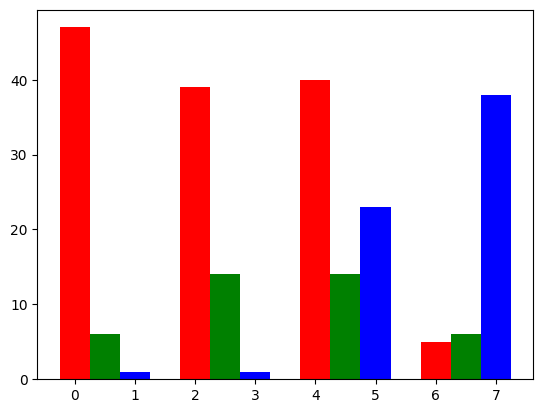

In [6]:
# 막대그래프 : 데이터의 개수나 크기를 비교
# 데이터 만들기 3 x 4 의 형태로 0~50사이의 임의의 데이터
# x data
data = np.random.randint(0,51,size=(3,4))
print(data)
# x 좌표 시작점
X = np.arange(0,8,2)

# 3개의 막대 그래프 생성
plt.bar(X+0.00, data[0], color = 'r', width = 0.5)
plt.bar(X+0.50, data[1], color = 'g', width = 0.5)
plt.bar(X+1.00, data[2], color = 'b', width = 0.5)
plt.show()

##### 누적 막대 그래프
  - 데이터를 밑에서부터 쌓아올려 데이터를 표현

In [9]:
data = np.random.randint(5,30,size=(3,4))
print(data)
color_list = ['r','g','b']
data_label = ['A','B','C']
X = np.arange(data.shape[1])
print(X)

[[24 11  9 23]
 [16 20 15 24]
 [ 8  6 16  8]]
[0 1 2 3]


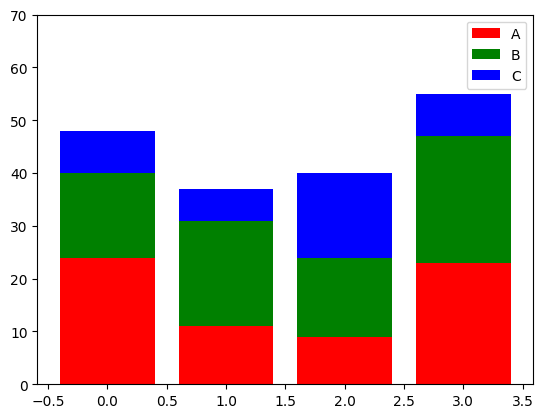

In [31]:
for i in range(3):
  plt.bar( X, data[i] ,bottom = np.sum(data[ :i ],axis=0), color = color_list[i],label = data_label[i] )

ylimit_num = np.sum(data,axis=0).max()+15

plt.ylim(0,ylimit_num)
plt.legend()
plt.show()

##### 히스토그램
  - 데이터의 분포를 파악할때.. 즉 구간별 누적 갯수

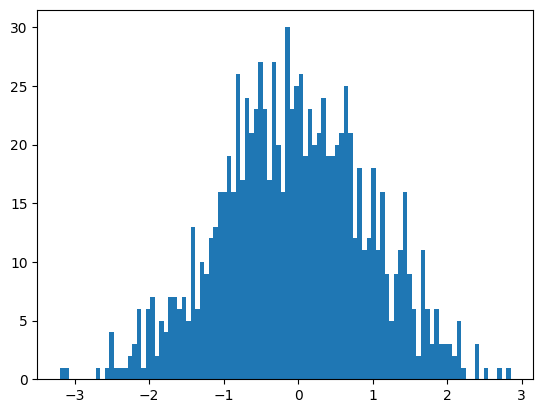

In [33]:
# 평균이 0이고 표준편차가 1인 정규분포형태의 데이터를 10개
X = np.random.normal(size=1000)
plt.hist(X,bins=100)
plt.show()

##### boxplot 상자그림
  - 4분위수
  - out liner(이상치)

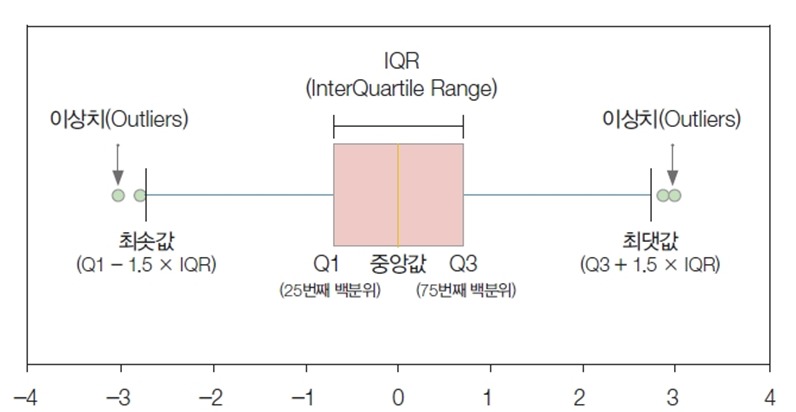

  - 데이터를 작은 데이터부터 큰 데이터까지 정렬
  - Q1(25%) 부터 Q3(75%)까지 박스형태로 위치
  - IQR(InterQualtile Range) :  Q3-Q1
  - 하단 : Q1 - 1.5xIQR
  - 상단 : Q3 + 1.5xIQR
  - 이상치(outlier) : 상단 갑시과 하단 값을 넘어가는 값들

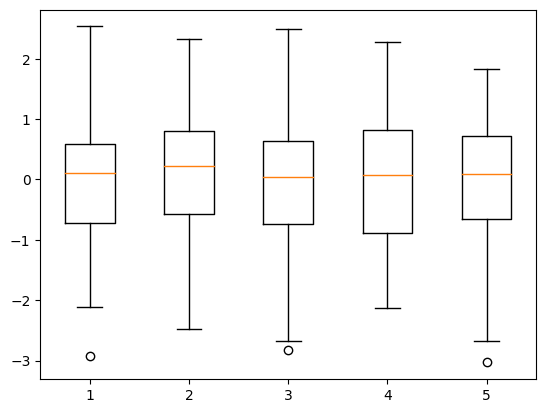

In [35]:
data = np.random.randn(100,5)
plt.boxplot(data)
plt.show()

##### seaborn(시본)
  - matplotlib를 감싼 wrapper 모듈
  - matplotlib 기능을 확장해서 좀더 편리하고 이쁘게 시각화를 도와주는 라이브러리
  - 축과 같은 복잡한 개념이 없다
  - xticks를 설정하지 않아도 각축에 라벨 자동으로 생성
  - 데이터프레임, x,y에 해당하는 열 이름만 지정

In [38]:
import seaborn as sns
import pandas as pd

In [39]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


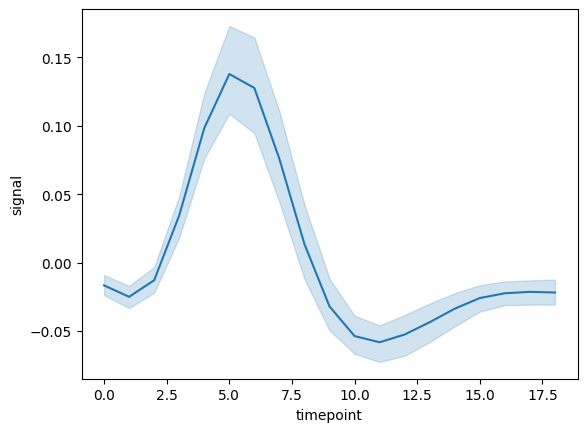

In [41]:
sns.lineplot(data = fmri, x='timepoint', y='signal')
plt.show()

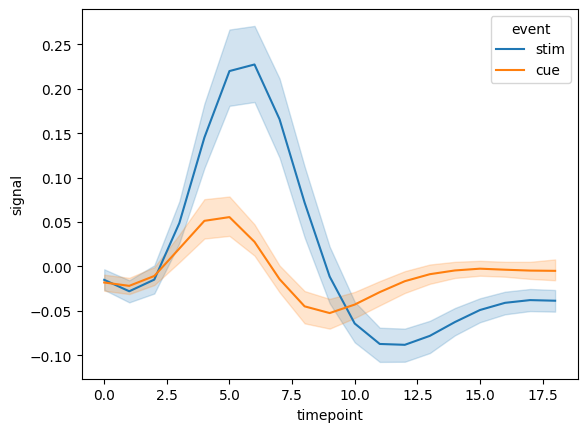

In [47]:
sns.lineplot(data = fmri, x='timepoint', y='signal', hue = 'event')
plt.show()

##### 회귀 그래프
  - 선형회귀 추세선을 그래프와함께 작성
  - x값대비 y값 변화를 예측하는 직선
  - 함수 regplot 사용

In [48]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


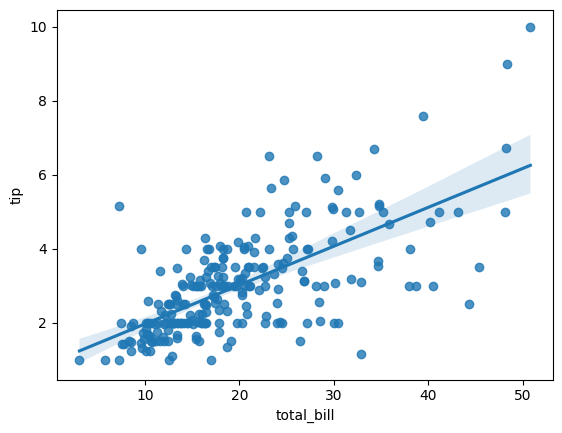

In [50]:
sns.regplot(data = tips, x='total_bill', y='tip')
plt.show()

 - 산점도
  - scatterplot

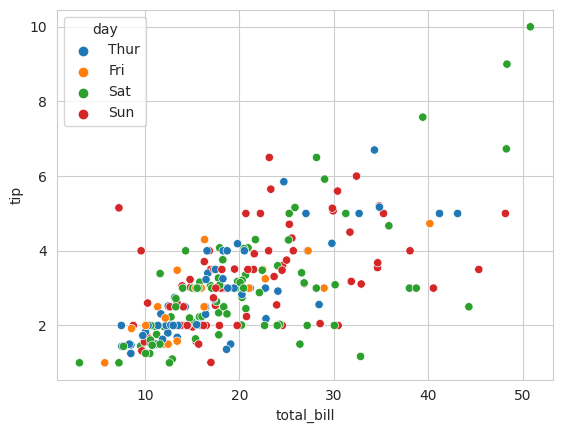

In [56]:
sns.set_style('whitegrid')
sns.scatterplot(data=tips, x='total_bill', y='tip',hue='day')
plt.show()

  - 비교 그래프 : 범주형 데이터의 항목별 개수
    - countplot

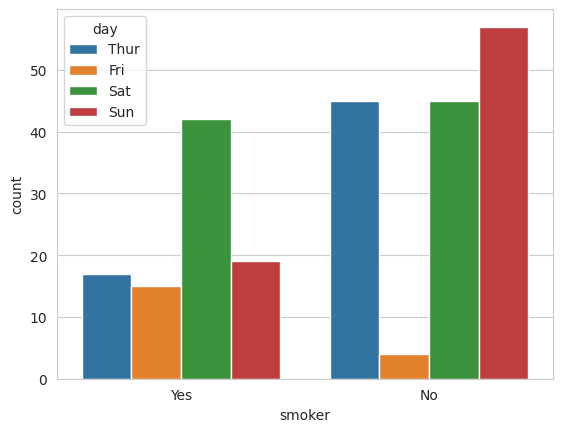

In [60]:
sns.countplot(data=tips,x='smoker',hue='day')
plt.show()

  - 막대그래프 : y값이 연속형 값일경우 해당 값들의 평균
  - 검은색 막대 : 데이터의 신뢰 구간 검은색 막대로표현
  - 함수 barplot

<Axes: xlabel='day', ylabel='total_bill'>

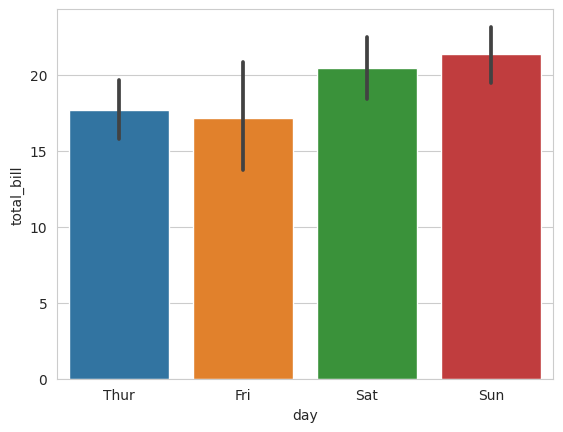

In [61]:
sns.barplot(data=tips, x='day',y='total_bill')

  - 바이올린 플롯 : 상자그림과 분포도를 한번에
    - x축에는 범주형 데이터, y축에는 연속형 데이터

<Axes: xlabel='day', ylabel='total_bill'>

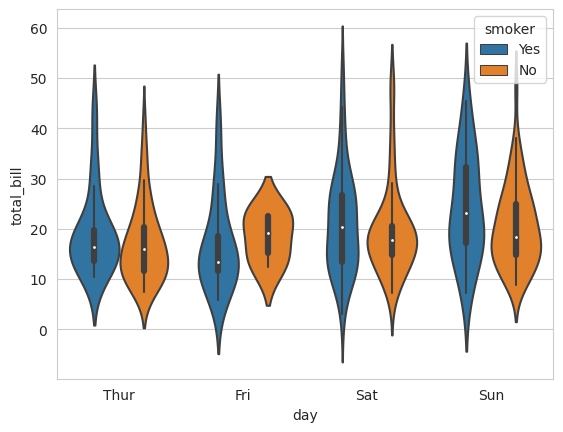

In [62]:
sns.violinplot(data=tips, x='day',y='total_bill', hue='smoker')

<Axes: xlabel='day', ylabel='total_bill'>

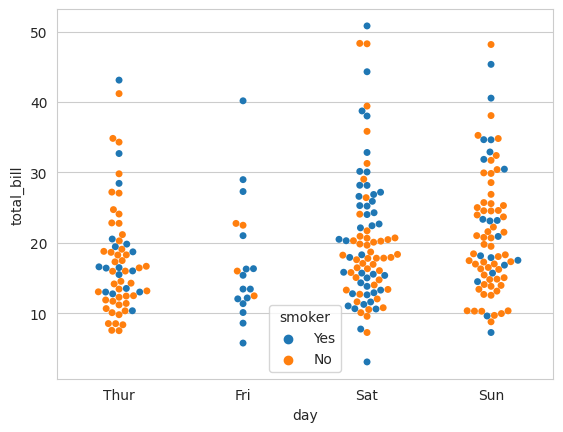

In [63]:
sns.swarmplot(data=tips, x='day',y='total_bill', hue='smoker')

  - 패싯 그리드

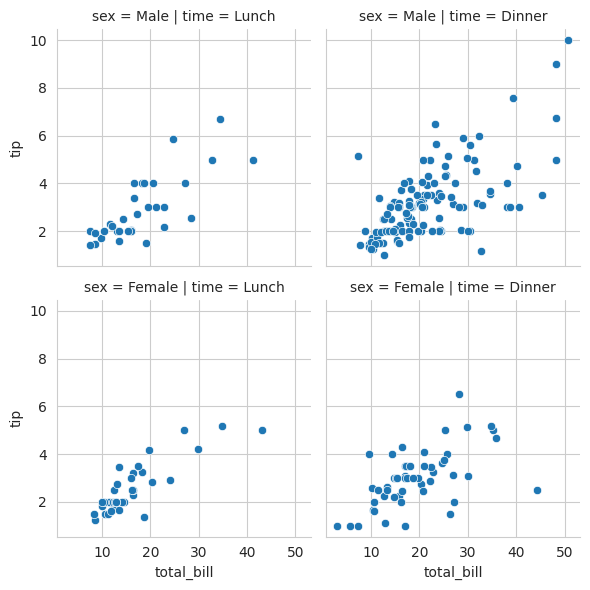

In [65]:
g = sns.FacetGrid(data=tips,col = 'time', row= 'sex')
g.map(sns.scatterplot,'total_bill','tip')

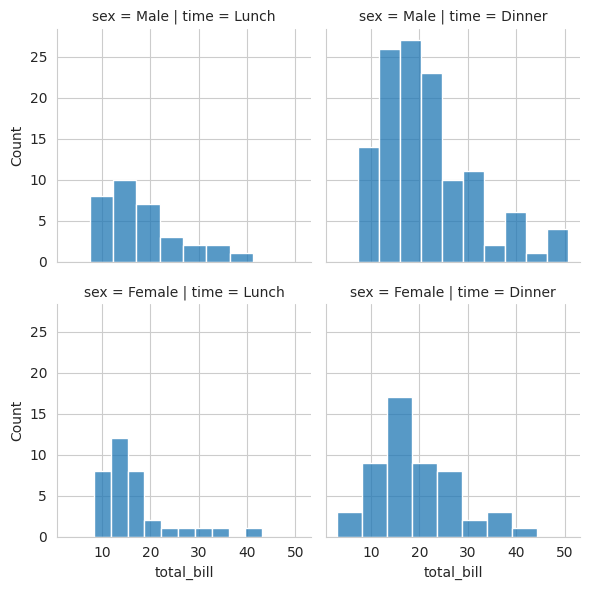

In [67]:
g = sns.FacetGrid(data=tips,col = 'time', row= 'sex')
g.map_dataframe(sns.histplot,x='total_bill')

  - heatmap
    

In [68]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [69]:
#월별 승객수
flights_pivot =  flights.pivot('month','year','passengers')
flights_pivot

<ipython-input-69-97838ecb5d9f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  flights_pivot =  flights.pivot('month','year','passengers')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


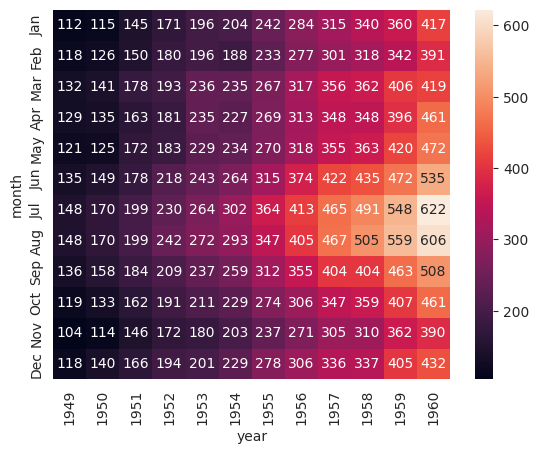

In [71]:
sns.heatmap(data = flights_pivot, annot=True,fmt='d')
plt.show()

응용
  - 타이타닉, 아이리스 그래프로 시각화

In [77]:
titanic = sns.load_dataset('titanic')
iris = sns.load_dataset('iris')

In [75]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [78]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 범주형 bar countplot
# 연속형 regplot scatterplot
# 범주형-연속형  : 바이올린 플랏 ,스웜플랏
# boxplot : 이상치여부판단
# heatmap